# Omniglot symbol drawing speed exploration

This notebook extracts the time taken to draw the symbol and the number of strokes (based on the pen up actions). But, only time is taken into consideration to find the easiest symbols.

## Find all stroke files

Note that this algorithm expects all stroke files to be within the relative `../Datasets/omniglot_strokes` folder.

In [1]:
import os

def list_files(dir, ext='txt'):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if name.endswith(ext):
                r.append(os.path.join(root, name))
    return r

In [2]:
stroke_file_paths = list_files("../Datasets/omniglot_strokes")
print("{} characters found".format(len(stroke_file_paths)))

32460 characters found


## Create a DataFrame with strokes and time

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(columns=['path', 'alphabet', 'character', 'strokes', 'time'])

In [5]:
for idx, stroke_file_path in enumerate(stroke_file_paths):
    path_components = stroke_file_path.split("/")
    character_nr = int(''.join(filter(str.isdigit, path_components[-2])))
    alphabet = path_components[-3]
    df.loc[idx] = (stroke_file_path, alphabet, character_nr, np.nan, np.nan)

In [6]:
for index, row in df.iterrows():
    with open(row[0]) as fp:
        lines = fp.readlines()
        nr_strokes = sum([1 for line in lines if "BREAK" in line])
        t = 0
        for line in reversed(lines):
            if "," in line:
                t = int(line.split(",")[-1])
                break
        
    df.loc[index, "strokes"] = nr_strokes
    df.loc[index, "time"] = t

In [7]:
df

,path,alphabet,character,strokes,time
0,../Datasets/omniglot_strokes/Gujarati/characte...,Gujarati,42,3,2264
1,../Datasets/omniglot_strokes/Gujarati/characte...,Gujarati,42,3,8889
2,../Datasets/omniglot_strokes/Gujarati/characte...,Gujarati,42,4,15040
3,../Datasets/omniglot_strokes/Gujarati/characte...,Gujarati,42,3,2416
4,../Datasets/omniglot_strokes/Gujarati/characte...,Gujarati,42,3,7230
...,...,...,...,...,...
32455,../Datasets/omniglot_strokes/Inuktitut_(Canadi...,Inuktitut_(Canadian_Aboriginal_Syllabics),8,2,6212
32456,../Datasets/omniglot_strokes/Inuktitut_(Canadi...,Inuktitut_(Canadian_Aboriginal_Syllabics),8,2,2776
32457,../Datasets/omniglot_strokes/Inuktitut_(Canadi...,Inuktitut_(Canadian_Aboriginal_Syllabics),8,1,456
32458,../Datasets/omniglot_strokes/Inuktitut_(Canadi...,Inuktitut_(Canadian_Aboriginal_Syllabics),8,2,5869


## Find the characters that were written the fastest

In [8]:
fastest_symbols = df.groupby(['alphabet', 'character'])['time'].apply(np.median).sort_values()

In [9]:
for alphabet, char in fastest_symbols.index:
    print(alphabet, char)

Braille 1
Old_Church_Slavonic_(Cyrillic) 12
ULOG 9
ULOG 8
ULOG 25
Malay_(Jawi_-_Arabic) 1
Atemayar_Qelisayer 1
Syriac_(Estrangelo) 7
Korean 19
Latin 12
Japanese_(katakana) 24
Korean 21
Anglo-Saxon_Futhorc 11
Avesta 9
Tifinagh 32
Avesta 21
Syriac_(Serto) 15
Syriac_(Estrangelo) 10
N_Ko 1
Malay_(Jawi_-_Arabic) 12
Hebrew 10
Syriac_(Serto) 7
Manipuri 22
Avesta 2
Hebrew 6
Korean 22
Greek 9
Korean 24
Japanese_(hiragana) 12
Manipuri 32
Early_Aramaic 12
Japanese_(hiragana) 18
Japanese_(hiragana) 29
Japanese_(hiragana) 8
Ojibwe_(Canadian_Aboriginal_Syllabics) 5
Latin 3
Malay_(Jawi_-_Arabic) 33
Tifinagh 9
Braille 9
Braille 3
Manipuri 4
Tifinagh 34
Japanese_(katakana) 28
Tifinagh 1
Gujarati 25
Braille 2
Malay_(Jawi_-_Arabic) 10
Greek 13
Malayalam 39
Glagolitic 45
Syriac_(Serto) 1
Tifinagh 55
Burmese_(Myanmar) 22
Hebrew 20
Braille 11
Syriac_(Estrangelo) 6
Latin 22
Malay_(Jawi_-_Arabic) 31
Latin 21
Old_Church_Slavonic_(Cyrillic) 20
Hebrew 11
Cyrillic 19
N_Ko 4
Syriac_(Estrangelo) 12
Blackfoot_(Canad

Aurek-Besh 7
Cyrillic 26
Anglo-Saxon_Futhorc 27
Tibetan 32
Atlantean 9
Arcadian 6
Balinese 19
Malayalam 33
Tifinagh 3
Tibetan 35
Tibetan 30
Arcadian 10
Ojibwe_(Canadian_Aboriginal_Syllabics) 13
Sanskrit 25
Tibetan 39
Arcadian 13
Armenian 7
Armenian 29
Keble 20
Oriya 26
Arcadian 12
Bengali 24
Gujarati 29
Glagolitic 12
Sanskrit 31
Mkhedruli_(Georgian) 4
Tibetan 8
Old_Church_Slavonic_(Cyrillic) 15
Manipuri 20
Tibetan 33
Glagolitic 28
Mkhedruli_(Georgian) 25
Manipuri 24
Atemayar_Qelisayer 22
Korean 29
Sanskrit 18
ULOG 7
Futurama 8
Ge_ez 19
Burmese_(Myanmar) 7
Atlantean 6
Gujarati 1
Cyrillic 29
Asomtavruli_(Georgian) 6
Grantha 17
Syriac_(Serto) 12
Tifinagh 29
Mongolian 1
Tibetan 3
Mkhedruli_(Georgian) 19
Tengwar 16
Aurek-Besh 14
Atemayar_Qelisayer 8
Gurmukhi 18
Grantha 26
Manipuri 13
Grantha 19
Japanese_(hiragana) 36
Tifinagh 52
Avesta 5
Atemayar_Qelisayer 26
Malayalam 28
Mkhedruli_(Georgian) 29
Oriya 28
Japanese_(katakana) 45
Bengali 34
Aurek-Besh 16
Tagalog 7
Malayalam 27
Glagolitic 39
Gu

In [10]:
import ipyplot
from PIL import Image

In [11]:
images = []
labels = []
easy_symbols = df.groupby(['alphabet', 'character'])['time'].apply(np.median).sort_values().index[0:400]
for alphabet, char in easy_symbols:
    char_row = df[(df.alphabet == alphabet) & (df.character == char)].iloc[0]
    path = "../Datasets/omniglot_images/{}/character{:02d}/{}".format(char_row.alphabet, char_row.character, char_row.path.split("/")[-1][:-3]+"png")
    labels.append(char_row.path.split("/")[-1].split("_")[0])
    images.append(Image.open(path))    

In [12]:
easy_symbols[9]

('Latin', 12)


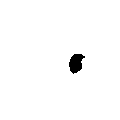
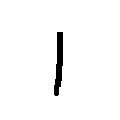
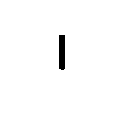
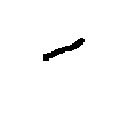
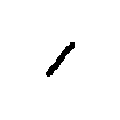
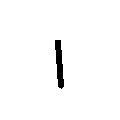
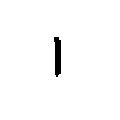
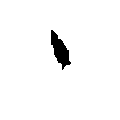
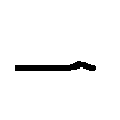
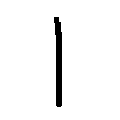
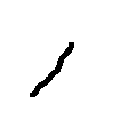
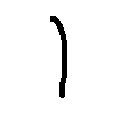
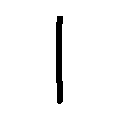
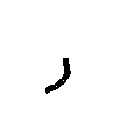
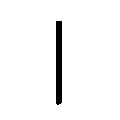
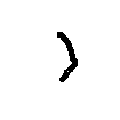
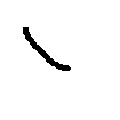
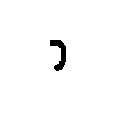
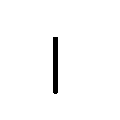
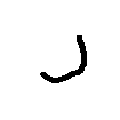
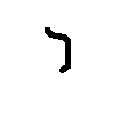
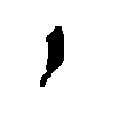
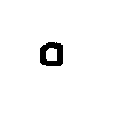
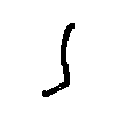
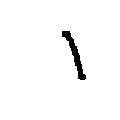
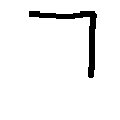
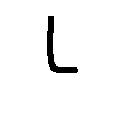
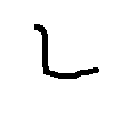
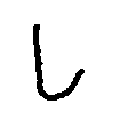
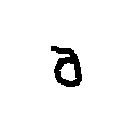
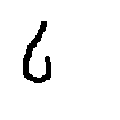
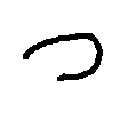
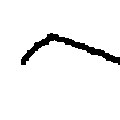
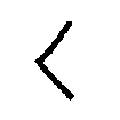
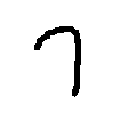
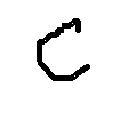
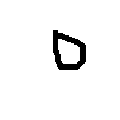
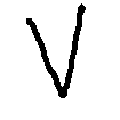
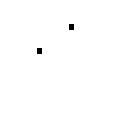
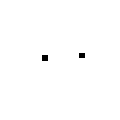
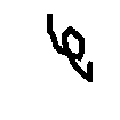
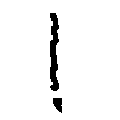
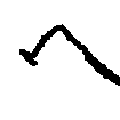
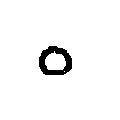
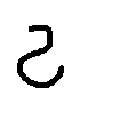
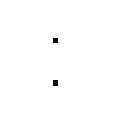
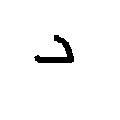
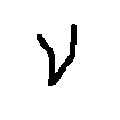
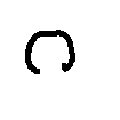
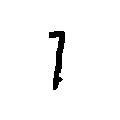
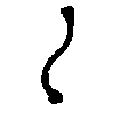
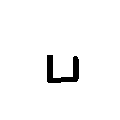
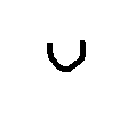
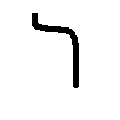
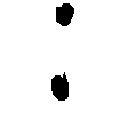
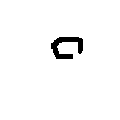
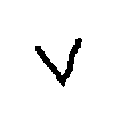
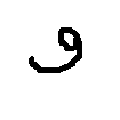
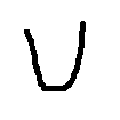
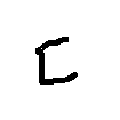
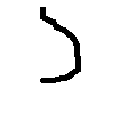
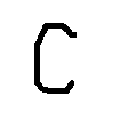
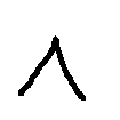
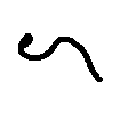
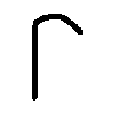
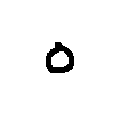
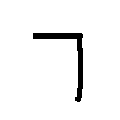
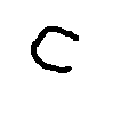
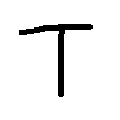
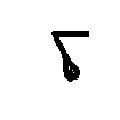
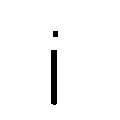
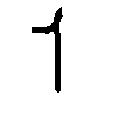
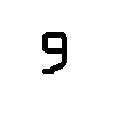
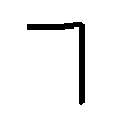
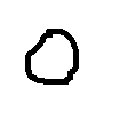
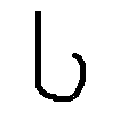
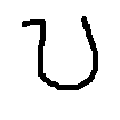
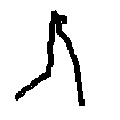
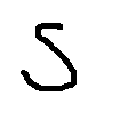
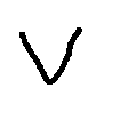
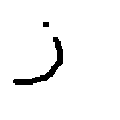
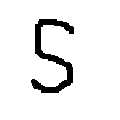
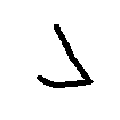
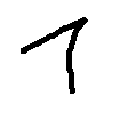
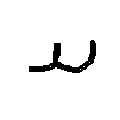
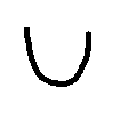
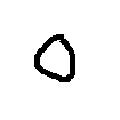
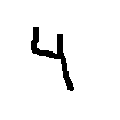
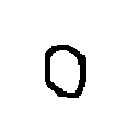
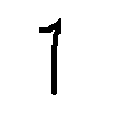
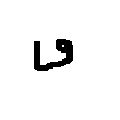
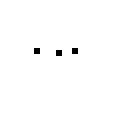
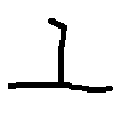
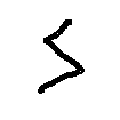
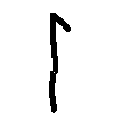
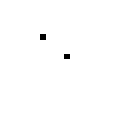
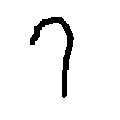
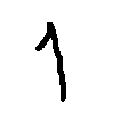
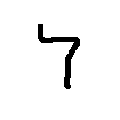
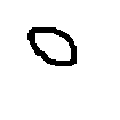

In [13]:
ipyplot.plot_images(images, labels, max_images=100, img_width=60)


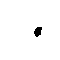
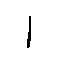
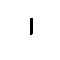
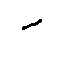
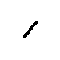
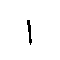
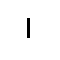
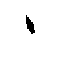
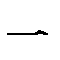
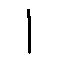
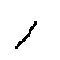
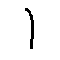
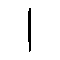
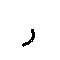
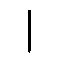
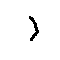
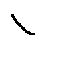
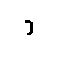
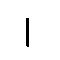
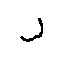
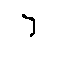
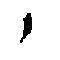
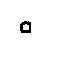
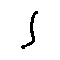
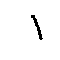
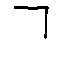
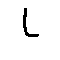
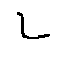
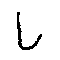
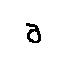
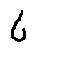
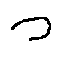
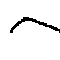
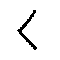
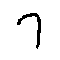
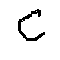
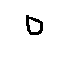
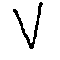
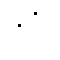
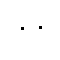
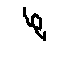
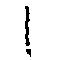
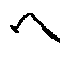
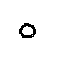
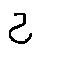
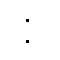
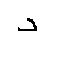
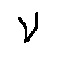
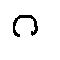
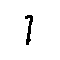
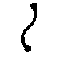
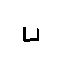
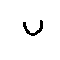
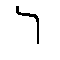
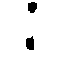
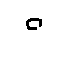
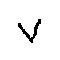
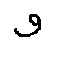
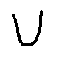
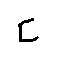
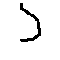
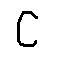
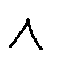
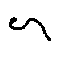
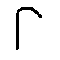
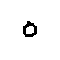
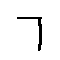
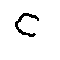
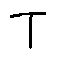
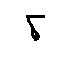
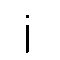
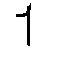
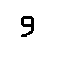
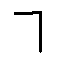
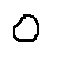
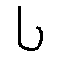
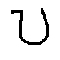
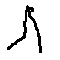
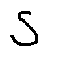
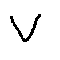
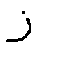
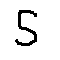
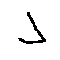
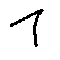
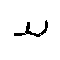
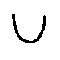
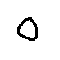
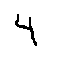
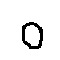
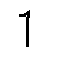
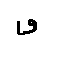
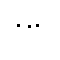
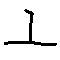
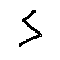
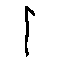
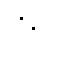
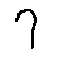
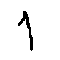
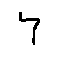
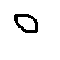
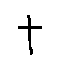
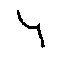
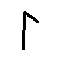
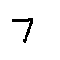
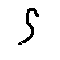
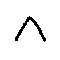
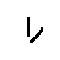
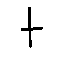
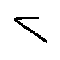
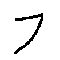
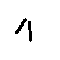
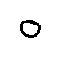
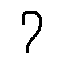
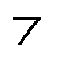
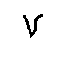
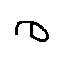
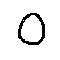
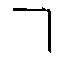
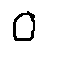
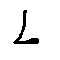
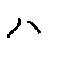
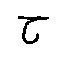
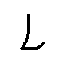
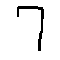
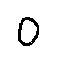
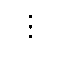
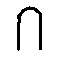
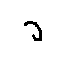
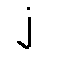
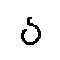
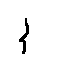
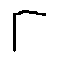
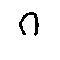
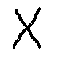
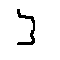
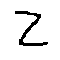
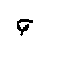
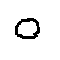
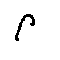
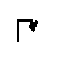
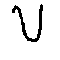
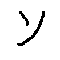
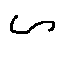
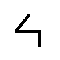
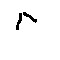
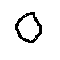
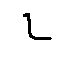
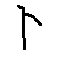
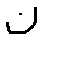
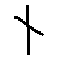
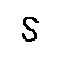
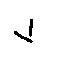
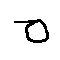
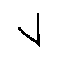
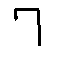
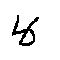
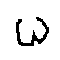
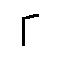
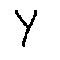
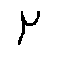
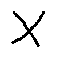
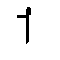
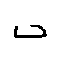
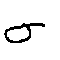
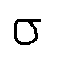
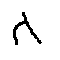
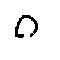
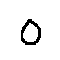
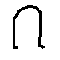
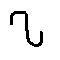
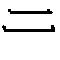
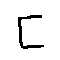
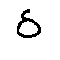
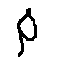
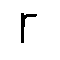
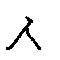
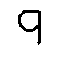
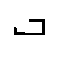
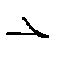
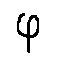
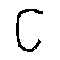
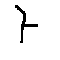
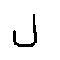
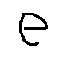
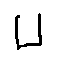
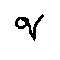
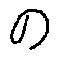
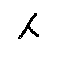
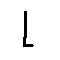
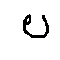
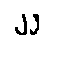
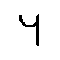
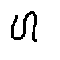
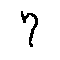
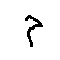
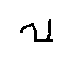
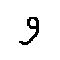
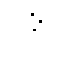
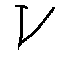
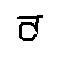
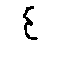
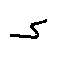
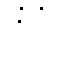
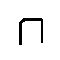
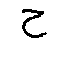
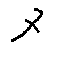
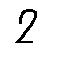
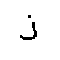
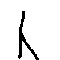
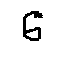
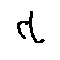
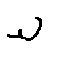
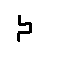
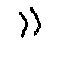
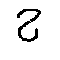
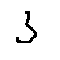
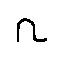
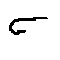
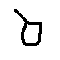
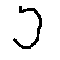
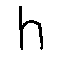
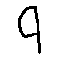
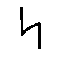
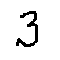
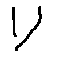
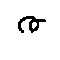
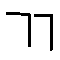
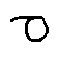
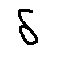
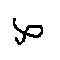
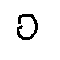
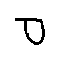
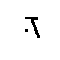
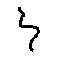
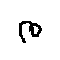
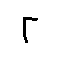
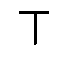
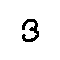
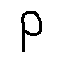
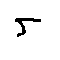
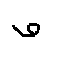
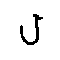
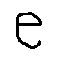
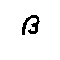
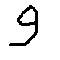
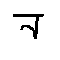
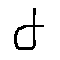
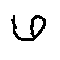
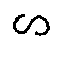
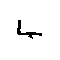
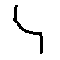
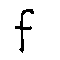
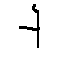
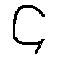
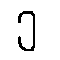
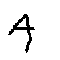
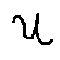
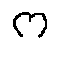
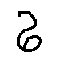
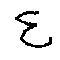
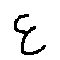
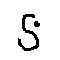
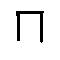
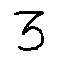
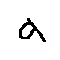
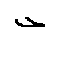
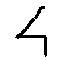
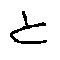
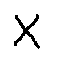
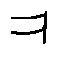
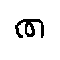
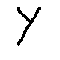
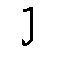
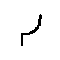
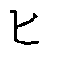
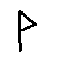
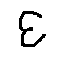
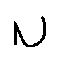
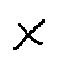
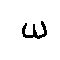
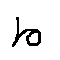
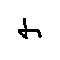
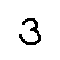
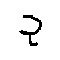
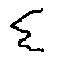
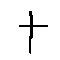
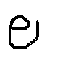
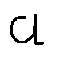
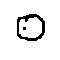
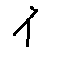
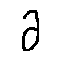
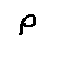
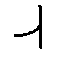
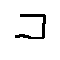
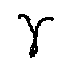
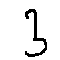
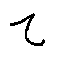
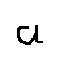
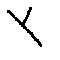
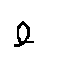
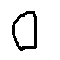
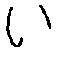
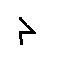
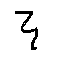
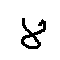
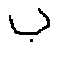
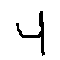
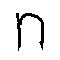
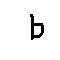
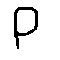
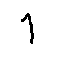
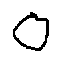
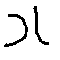
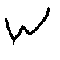
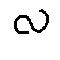
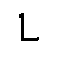
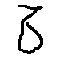
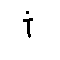
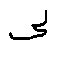
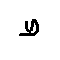
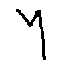
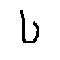
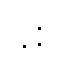
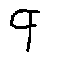
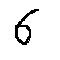
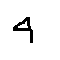
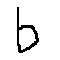
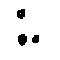
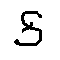
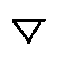
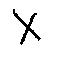
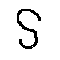
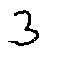
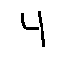
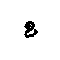
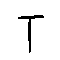
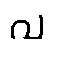
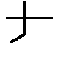
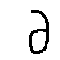
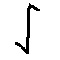
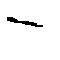
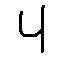
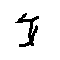
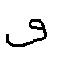
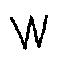
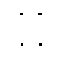
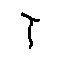
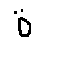
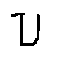
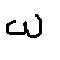
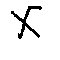
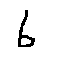
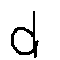
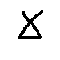
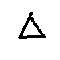
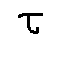
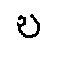
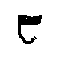
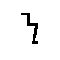
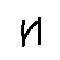
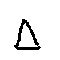
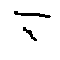
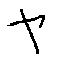
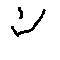
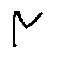
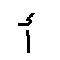
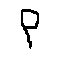
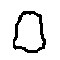
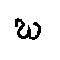
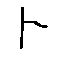
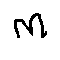
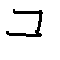
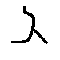
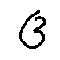
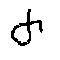
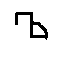
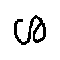
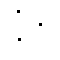
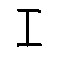
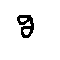
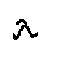
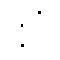
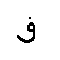
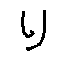
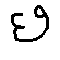
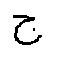
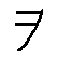
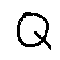
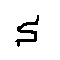
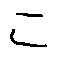
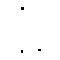
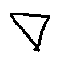
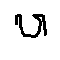
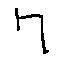
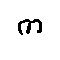
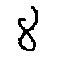
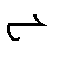
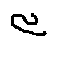
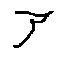
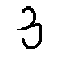

In [14]:
ipyplot.plot_images(images, max_images=400, img_width=30)

## Time spent by number fo strokes

In [47]:
df.loc[28112]

path         ../Datasets/omniglot_strokes/Alphabet_of_the_M...
alphabet                                  Alphabet_of_the_Magi
character                                                    8
strokes                                                    101
time                                                     58925
Name: 28112, dtype: object

In [67]:
med_strokes = df.groupby(['alphabet', 'character'])['strokes'].apply(np.median)
med_time = df.groupby(['alphabet', 'character'])['time'].apply(np.median)

In [71]:
strokes_time = pd.concat([med_strokes, med_time], axis=1)
strokes_time

strokes    time
alphabet             character                 
Alphabet_of_the_Magi 1              3.5  7756.0
                     2              3.0  7436.0
                     3              4.0  6871.5
                     4              3.0  3757.0
                     5              2.5  5418.0
...                                 ...     ...
ULOG                 22             4.0  5872.5
                     23             3.0  4287.0
                     24             5.0  8600.0
                     25             1.0   503.0
                     26             4.0  6494.5

[1623 rows x 2 columns]

In [73]:
median_by_strokes = strokes_time.groupby(['strokes'])['time'].apply(np.median)
median_by_strokes

strokes
1.0     2909.50
1.5     3927.75
2.0     4464.75
2.5     5471.50
3.0     5854.00
3.5     7846.50
4.0     7345.25
4.5    10520.50
5.0     9938.50
5.5    13032.75
6.0    11325.00
7.0    16349.00
8.0    13470.75
9.0    16352.50
Name: time, dtype: float64

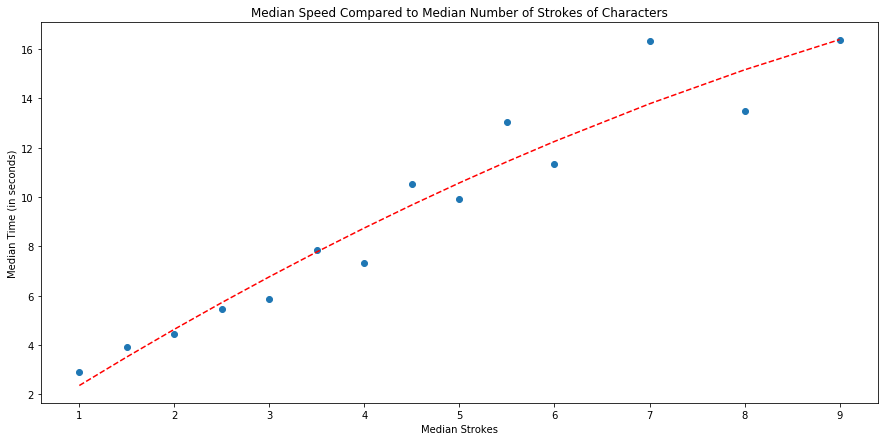

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

x = median_by_strokes.index
y = median_by_strokes.values / 1000

plt.figure(figsize=(15,7))
plt.scatter(x, y)
plt.xlabel("Median Strokes")
plt.ylabel("Median Time (in seconds)")
plt.title("Median Speed Compared to Median Number of Strokes of Characters")

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()